<a href="https://colab.research.google.com/github/jitenderchaurasia5/BitVision/blob/master/K_Nearest_Neighbors_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 - Import the Libraries

In [1]:
!pip install yfinance



In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Step 2 - Fetch the Data

In [2]:
pip install --upgrade pandas

In [3]:
pip install --upgrade pandas-datareader


In [6]:
# Read the data from Yahoo
df= pdr.get_data_yahoo('SPY', '2021-01-01', '2022-01-01')

df = df.dropna()
df = df[['Open', 'High', 'Low','Close']]
df.head()

,Open,High,Low,Close
Date,,,,
2021-01-04,375.309998,375.450012,364.820007,368.790009
2021-01-05,368.100006,372.500000,368.049988,371.329987
2021-01-06,369.709991,376.980011,369.119995,373.549988
2021-01-07,376.100006,379.899994,375.910004,379.100006
2021-01-08,380.589996,381.489990,377.100006,381.260010


Step 3 - Define Predictor Variable

In [7]:
# Predictor variables
df['Open-Close']= df.Open -df.Close
df['High-Low']  = df.High - df.Low
df =df.dropna()
X= df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2021-01-04,6.519989,10.630005
2021-01-05,-3.229980,4.450012
2021-01-06,-3.839996,7.860016
2021-01-07,-3.000000,3.989990
2021-01-08,-0.670013,4.389984


Step 4 - Define Target Variables

In [8]:
# Target variable
Y= np.where(df['Close'].shift(-1)>df['Close'],1,-1)

Step 5 - Split the Dataset

In [9]:
# Splitting the dataset
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

Step 6 - Instantiate KNN Model

In [10]:
# Instantiate KNN learning model(k=15)
knn = KNeighborsClassifier(n_neighbors=15)

# fit the model
knn.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.62
Test_data Accuracy: 0.53


Step 7 - Create trading strategy using the model

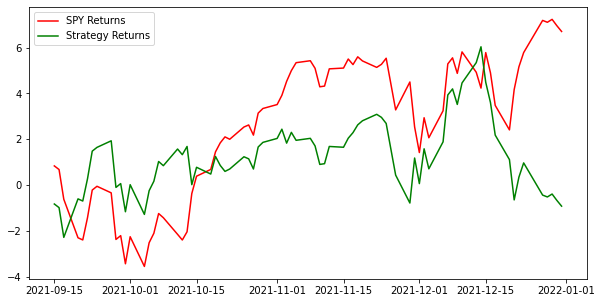

In [11]:
# Predicted Signal
df['Predicted_Signal'] = knn.predict(X)

# SPY Cumulative Returns
df['SPY_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_SPY_returns = df[split:]['SPY_returns'].cumsum()*100

# Cumulative Strategy Returns 
df['Startegy_returns'] = df['SPY_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = df[split:]['Startegy_returns'].cumsum()*100

# Plot the results to visualize the performance

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

Step 8 - Sharpe Ratio

In [12]:
# Calculate Sharpe ratio
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: -0.83
